## Namen der Gruppenmitglieder: 
### __Sükrü Kakici, Richard Haim, Isabelle Rossmann__



## Übungsbeispiel: Aufgabe 1: Netzwerkanalyse für Journaldaten

#### Aufgabenstellung

Zur Verfügung stehen Daten zu Journalartikel (_data_journals.csv_). Diese Daten sollen für eine Netzwerkanalyse aufbereitet und entsprechend verarbeitet werden. Dazu gehört auch die Überlegung, welche Beziehungen mithilfe eines Netzwerkes dargestellt, welche Werte für Kanten- bzw. Knotenattribute verwendet und welche Fragen mithilfe des Netzwerkes beantwortet werden sollen.


#### Vorgaben für die Ausführung

* Sie können beliebig viele (Code- oder Markdown)-Zellen einfügen, achten Sie aber auf eine übersichtliche Struktur. 
* Nach jeder Codezelle beschreiben Sie in einer Markdownzelle Ihre Vorgehensweise und interpretieren Sie Ihre Ergebnisse. 
* Am Ende des Jupyter Notebooks muss eine abschließende Beurteilung und Interpretation Ihres Netzwerkes vorhanden sein. 



#### Kurze Beschreibung der Daten

Die Daten stammen aus einer Auswertung mit MAXQDA: Mit dieser Software wurden insgesamt die Artikel der letzten 3 Jahre aus 7 verschiedenen Journals der Wirtschaftsinformatik (EJIS, ISJ, JAIS, JIT, JMIS, JSIS, MISQ) in Hinblick auf die verwendeten Methoden kodiert. Dabei wurden nur jene Journalbeiträge kodiert, die im Titel oder im Abstrakt das Wort empirisch enthalten haben.

Aus MAXQDA wird eine csv-Datei in Long Form exportiert, d.h. mit 2 Spalten (Dokumentname und Titel/Autor/Keywords/...). Diese csv-Datei wurde in R eingelesen und für die weitere Auswertung aufbereitet.

Die mit R bereinigte Daten sind in Wide Form: Jede Zeile entspricht einem Artikel, wobei die Koautor\*innen bereits in separate Spalten aufgelistet sind (maximale Anzahl an Autor*innnen: 6). 

In [1]:
# notwendige libraries
import collections
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 1 Beschreibung der Daten
Lesen Sie die Daten _data_journals.csv_ in Python ein und geben Sie einen Überblick über die Daten (deskriptive Statistik; dazu eignet sich die library _pandas_).

In [2]:
import pandas as pd
data = pd.read_csv("./data_journals.csv")

In [3]:
data.head()

,Unnamed: 0,Dokumentname,Titel,Autor_1,Autor_2,Autor_3,Autor_4,Autor_5,Autor_6,Keywords,Abstract,Kuerzel,Journal,Jahr,Methodenkapitel,Methode,Research,Einleitung
0,0,Worker-stress-in-the-age-of-mobile-technology-...,Worker stress in the age of mobile technology:...,Stefan Tams,Manju Ahuja,Jason Bennett Thatcher,Varun Grover,NaN,NaN,Interruptions Work-life conflict Technostres...,Mobile technologies have dramatically increase...,JSIS,Journal of Strategic Information Systems,2020,Method \r\nData were collected from 601 knowle...,The quality of our survey instrument was asses...,NaN,NaN
1,1,Examining-interdependence-between-product-user...,Examining interdependence between product user...,Jie Yan,Dorothy E. Leidner,Hind Benbya,Weifei Zou,NaN,NaN,Online user communities Interdependence So...,Firm-sponsored online user communities have be...,JSIS,Journal of Strategic Information Systems,2021,Methodology \r\nContext and data collection ...,Analyzing data from an online user community o...,NaN,NaN
2,2,Digital-work-and-organisational-transformation...,Digital work and organisational transformation...,João Baptista,Mari-Klara Stein,Stefan Klein,Mary Beth Watson-Manheim,Jungwoo Lee,NaN,Digital work Organisational transformation D...,Workplace technologies are more central to wor...,JSIS,Journal of Strategic Information Systems,2020,NaN,NaN,NaN,NaN
3,3,Digital-opportunities-for-incumbents---A-re_20...,Digital opportunities for incumbents – \r\nA ...,Anna Maria Oberländer,Maximilian Röglinger,Michael Rosemann,NaN,NaN,NaN,Digital opportunity Digital innovation Dig...,Digitalization presents companies with abundan...,JSIS,Journal of Strategic Information Systems,2021,NaN,We evaluated the taxonomy and the stylized fac...,How can the interplay between incumbents’ re...,NaN
4,4,Accomplishing-the-layered-modular-architecture...,Accomplishing the layered modular architecture...,Lena Hylving,Ulrike Schultze,NaN,NaN,NaN,NaN,Digitalization Digital control system Laye...,Architectural theory of digital innovation con...,JSIS,Journal of Strategic Information Systems,2020,Data collection \r\nTo gain insight into the ...,"To answer this research question, we rely on a...",“Given that the layered modular architecture ...,"To answer this research question, we rely on a..."


**Um einen Überblick über die Daten zu erhalten, lassen wir uns mit dem Befehl data.head() die Spaltentitel sowie einige Werte anzeigen.**

In [4]:
type(data)

pandas.core.frame.DataFrame

**Der Befehl type() gibt an, um welchen Objekttyp es sich handelt.**

In [5]:
import pyreadr as pyr
data2 = pyr.read_r('data_authors_20220718.RData')
type(data2)
data2 = data2['data']
data2.head()

,Dokumentname,Titel,Autor_1,Autor_2,Autor_3,Autor_4,Autor_5,Autor_6,Keywords,Abstract,Kuerzel,Journal,Jahr,Methodenkapitel,Methode,Research,Einleitung
0,Worker-stress-in-the-age-of-mobile-technology-...,Worker stress in the age of mobile technology:...,Stefan Tams,Manju Ahuja,Jason Bennett Thatcher,Varun Grover,NaN,NaN,Interruptions Work-life conflict Technostres...,Mobile technologies have dramatically increase...,JSIS,Journal of Strategic Information Systems,2020,Method \r\nData were collected from 601 knowle...,The quality of our survey instrument was asses...,NaN,NaN
1,Examining-interdependence-between-product-user...,Examining interdependence between product user...,Jie Yan,Dorothy E. Leidner,Hind Benbya,Weifei Zou,NaN,NaN,Online user communities Interdependence So...,Firm-sponsored online user communities have be...,JSIS,Journal of Strategic Information Systems,2021,Methodology \r\nContext and data collection ...,Analyzing data from an online user community o...,NaN,NaN
2,Digital-work-and-organisational-transformation...,Digital work and organisational transformation...,João Baptista,Mari-Klara Stein,Stefan Klein,Mary Beth Watson-Manheim,Jungwoo Lee,NaN,Digital work Organisational transformation D...,Workplace technologies are more central to wor...,JSIS,Journal of Strategic Information Systems,2020,NaN,NaN,NaN,NaN
3,Digital-opportunities-for-incumbents---A-re_20...,Digital opportunities for incumbents – \r\nA ...,Anna Maria Oberländer,Maximilian Röglinger,Michael Rosemann,NaN,NaN,NaN,Digital opportunity Digital innovation Dig...,Digitalization presents companies with abundan...,JSIS,Journal of Strategic Information Systems,2021,NaN,We evaluated the taxonomy and the stylized fac...,How can the interplay between incumbents’ re...,NaN
4,Accomplishing-the-layered-modular-architecture...,Accomplishing the layered modular architecture...,Lena Hylving,Ulrike Schultze,NaN,NaN,NaN,NaN,Digitalization Digital control system Laye...,Architectural theory of digital innovation con...,JSIS,Journal of Strategic Information Systems,2020,Data collection \r\nTo gain insight into the ...,"To answer this research question, we rely on a...",“Given that the layered modular architecture ...,"To answer this research question, we rely on a..."


**Die R-Datei wird eingelesen und deklariert. Anschließend wird ein Überblick über die Daten angegeben.**

In [6]:
data["Dokumentname"].value_counts()

Worker-stress-in-the-age-of-mobile-technology--The-c_2020_The-J    1
Designing for the future in the age of pandemics a future ready    1
Resilience against crises COVID 19 and lessons from natural dis    1
Bringing Context Inside Process Research                           1
What Do I Do in a World of Artificial Intelligence                 1
                                                                  ..
Digital transformation and the new logics of business process m    1
Curbing cyberloafing_ studying general and specific deterrence     1
Complementary Technology Traces in Software Practice A Retrospe    1
Detection of early warning signals for overruns in IS projects_    1
THEORIZING THE MULTIPLICITY OF DIGITAL PHENOMENA                   1
Name: Dokumentname, Length: 180, dtype: int64

**Wie viele Publikationen nach Stichwort _Dokumentname_ je Jahr, daher der Befehl value_counts()**

In [7]:
data["Titel"].value_counts()

Worker stress in the age of mobile technology: The combined  effects of perceived interruption overload and worker control                                              1
Designing for the future in the age of pandemics: a future-ready design   research (FRDR) process                                                                       1
Resilience against crises: COVID-19 and lessons from natural disasters                                                                                                  1
Bringing Context Inside Process Research   with Digital Trace Data                                                                                                      1
What Do I Do in a World of Artificial Intelligence?   Investigating the Impact of Substitutive Decision-Making   AI Systems on Employees’ Professional Role Identity    1
                                                                                                                                                      

**Wie viele Publikationen nach Stichwort _Titel_ je Jahr, daher der Befehl value_counts()**

<AxesSubplot: title={'center': 'Verteilung der Publikationen je Autor'}>

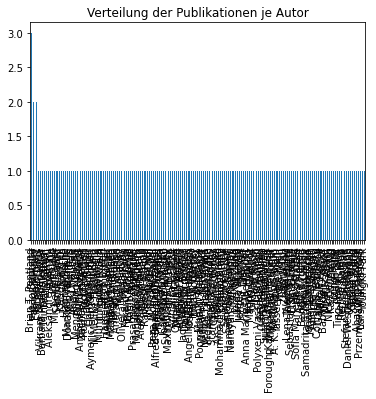

In [8]:
dataAutor = data["Autor_1"].value_counts()
dataAutor.plot(kind="bar" , title="Verteilung der Publikationen je Autor")

In [9]:
pd.crosstab(index=data['Journal'], columns=data['Jahr'], margins=True)

Jahr,2020,2021,2022,All
Journal,,,,
EUROPEAN JOURNAL OF INFORMATION SYSTEMS,32,30,1,63
Information System Journal,4,2,0,6
JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,8,11,0,19
Journal of Information Technology,12,12,0,24
Journal of Strategic Information Systems,18,16,0,34
Journal of the Association for Information Systems,13,2,0,15
MIS Quarterly Vol. 44 No. 1,3,0,0,3
MIS Quarterly Vol. 44 No. 3,1,0,0,1
MIS Quarterly Vol. 44 No. 4,2,0,0,2


**Eine Kreuztabelle für die Variablen Journal und Jahr, welche aufzeigt wie viele der verschiedenen Journale in welchen Jahren publiziert wurden. Sie zeigt auf, dass es im Jahr 2020 die meisten Publikationen gab. Auch zeigt sie auf, dass das European Journal of Information Systems die meisten Publikationen veröffentlicht hat.**

### 2 Wahl des Netzwerkes
Beurteilen Sie die Daten danach, welche Informationen bzw. Beziehungen mithilfe eines Netzwerkes dargestellt werden können. Die folgenden Fragen können Ihnen eine Hilfestellung geben: 
* Welche Beziehungen sind in den Daten vorhanden?
* Welche Beziehungen können in Form eines Netzwerkes dargestellt werden?
* Was könnten Knoten sein, was Kanten? 
* Welche Informationen können auf den Kanten, auf den Knoten liegen? 
* Sind die Beziehungen gerichtet oder ungerichtet?
* Welche Information kann man aus diesem Netzwerk holen? 

Wählen Sie Ihre Form des Netzwerkes und überlegen Sie sich mindestens 3 Fragen, die mithilfe des Netzwerkes beantwortet werden soll. 

#### Folgende Beziehungen könnten in Form eines Netzwerkes dargestellt werden: 

##### Wie viele Publikationen gesamt je Autor in einem bestimmten Jahr? - Knoten: Publikationen eines Autors | Kanten: Jahre
##### Welche Autoren haben miteinander bereits (in welchen Jahren) zusammen gearbeitet? Knoten: Autoren | Kanten: Jahre
##### Welche Autoren haben miteinander bereits (in welchen Jahren) zusammen gearbeitet? Knoten: Autoren | Kanten: Anzahl der Dokumente?

#### Mögliches Netzwerk mit Journaltyp?

### Ausgewähltes Netzwerk:
#### AutorInnen untereinander, wer hat mit wem zusammengearbeitet (ungerichtet, Knoten = AutorIn, Kantenlänge = Anzahl der Dokumente)
### Folgende Fragen sollen mithilfe des Netzwerkes beantwortet werden:
#### Welche/welcher AutorIn hat den höchsten Knotengrad --> Am meisten mit anderen AutorInnen publiziert
#### Schwankt die Zahl der zusammen publizierten Werke je Autor sehr stark, oder haben die meisten Autoren ungefähr gleiche Anzahl an gemeinsamen Publikationen
#### Ist die Anzahl der Autoren zu groß für ein Netzwerk welches alle Autoren miteinbeschließt? Ist es sinnvoll?


### 3 Vorbereitung der Daten
Einem Graphen können Knoten als einfache Liste und Kanten als Liste, die Tupels der Form (Knoten1, Knoten2) oder Tripels der Form (Knoten1, Knoten2, Dictionary) enthält. Bei einem Tripel sind die Informationen für die Kantenattribute gespeichert.

``G.add_nodes_from(list)``

``G.add_weighted_edges_from(list)``

Das bedeutet, dass Sie sich überlegen müssen, wie die Daten auf- und vorbereitet werden müssen, damit Sie diese dem Graphen übergeben können.

In [10]:
data.head()

data_authors = data[['Autor_1','Autor_2','Autor_3','Autor_4','Autor_5','Autor_6']]

data_authors.head()

authors_list = data_authors.T.apply(lambda x: x.dropna().tolist()).tolist()
authors_list[:4]


[['Stefan Tams', 'Manju Ahuja', 'Jason Bennett Thatcher', 'Varun Grover'],
 ['Jie Yan', 'Dorothy E. Leidner', 'Hind Benbya', 'Weifei Zou'],
 ['João Baptista',
  'Mari-Klara Stein',
  'Stefan Klein',
  'Mary Beth Watson-Manheim',
  'Jungwoo Lee'],
 ['Anna Maria Oberländer', 'Maximilian Röglinger', 'Michael Rosemann']]

**Nun werden die AutorInnen selektiert. 
Der Befehl _apply(lambda x: x.dropna().tolist()).tolist()_ besteht aus den 2 Befehlen _apply()_ und _lambda_. _apply()_ ist eine Funktion die auf jede Spalze angewendet wird, die _lambda_ Funktion wird als Argument übergeben. Diese Kombination ist zur Entfernung der Zeilen mit fehlenden Werten _dropna_ sowie das Konvertierten jeder Spalte in eine Liste _tolist_. Das Endziel ist die Konvertierung des Dataframe in eine Liste.**

In [11]:
authors = [item for lists in authors_list for item in lists]
authors = sorted(list(set(authors)))
authors

['A. K. M. Najmul Islam',
 'Abayomi Baiyere',
 'Abdallah Alsaad',
 'Abdallah Taamneh',
 'Adamantia Pateli',
 'Adrian Holzer',
 'Aggeliki Tsohou',
 'Agnieszka Kacprzak',
 'Akshay Bhagwatwar',
 'Alain Klarsfeld',
 'Alain Pinsonneault',
 'Alejandro Germán Frank',
 'Aleksandre Asatiani',
 'Alexander Benlian',
 'Alexander D. Wilson',
 'Alexandra Durcikova',
 'Alfred Benedikt Brendel',
 'Aline Fernandes',
 'Alvaro E. Arenas',
 'Amanda J. Porter',
 'Ana Isabel Canhoto',
 'Ana Paula Barquet',
 'Anand Jeyaraj',
 'Andrea Carugati',
 'Andreas Hein',
 'Andreas Janson',
 'Andrew G. Mueller',
 'Andrew Hardin',
 'Andrew Urbaczewski',
 'André Hanelt',
 'Andy Nguyen',
 'Angelika Zimmermann',
 'Anna Maria Oberländer',
 'Anna Sandberg',
 'Anna Wiedemann',
 'Annalisa Pelizza',
 'Anne-Sophie Mayer',
 'Antonio Giangreco',
 'Antti Salovaara',
 'Anuragini Shirish',
 'Arno L. P. Nuijten',
 'Arto Lanamäki',
 'Arun Rai',
 'Atreyi Kankanhalli',
 'Aymeric Hemon-Hildgen',
 'Babajide Osatuyi',
 'Barbara Prommegger',

**Es wird eine Liste mit allen Autoren erzeugt (ohne doppelten Namen)**

In [12]:
from itertools import chain
from collections import Counter 

def countList(listOflists, author):     
    return Counter(chain.from_iterable(set(i) for i in listOflists))[author]

**Zunächst wird die Methode _chain.fromiterable_ aus dem itertools Modul verwendet, um alle Listen in eine einzige zu formen. Danach wird die _set_ Funktion verwendet um in eine Menge ohne Duplikate zu konvertieren. Ziel der Funktion ist die Anzahl der Autoren in einer Liste.**

In [13]:
count_papers = {}
for author in authors:
    count_papers[author] = countList(authors_list, author)   
Counter(count_papers.values())

Counter({2: 43, 1: 446, 3: 9})

**_countList_ wird für jeden Autor in der Liste "authors" ausgeführt und speichert anschließend das Ergebenis der Funktion im Dictionary "count_papers". Ziel ist ein Counter Objekt, das die Anzahl der Auftritte jedes Wertes im Dict "count_papers" zählt --> Counter=Zähler. Somit bekommen wir eine Auskünft über die Häufigkeit, mit der jede Anzahl an Publikationen von Autoren in der Liste "authors_list" vorkommt.**

In [14]:
import networkx as nx

In [15]:
co_authors = {}
weighted_edges = []

for author in authors:
    coauthor_list = []
    for sublist in authors_list:
        if author in sublist:
            coauthor_list.append(sublist)

    coauthor_list = [item for lists in coauthor_list for item in lists]
    values = list(set(coauthor_list))
    values.remove(author)
    co_authors[author] = values

    occurences = Counter(coauthor_list)
    occurences.pop(author)
    occurences = [(author, coauthor, number) for coauthor, number in occurences.items()]
    weighted_edges.append(occurences)

weighted_edges = [item for lists in weighted_edges for item in lists]

**Erstellung der Kanten - in unserem Fall sind dies alle Kooperationen der Autoren**

In [16]:
weighted_edges

[('A. K. M. Najmul Islam', 'Ronald Cenfetelli', 1),
 ('A. K. M. Najmul Islam', 'Izak Benbasat', 1),
 ('A. K. M. Najmul Islam', 'Samuli Laato', 1),
 ('A. K. M. Najmul Islam', 'Muhammad Nazrul Islam', 1),
 ('A. K. M. Najmul Islam', 'Eoin Whelan', 1),
 ('Abayomi Baiyere', 'Hannu Salmela', 1),
 ('Abayomi Baiyere', 'Tommi Tapanainen', 1),
 ('Abdallah Alsaad', 'Abdallah Taamneh', 1),
 ('Abdallah Alsaad', 'Ismail Sila', 1),
 ('Abdallah Alsaad', 'Hamzah Elrehail', 1),
 ('Abdallah Taamneh', 'Abdallah Alsaad', 1),
 ('Abdallah Taamneh', 'Ismail Sila', 1),
 ('Abdallah Taamneh', 'Hamzah Elrehail', 1),
 ('Adamantia Pateli', 'Patrick Mikalef', 1),
 ('Adamantia Pateli', 'Rogier van de Wetering', 1),
 ('Adrian Holzer', 'Bruno Kocher', 1),
 ('Adrian Holzer', 'Samuel Bendahan', 1),
 ('Adrian Holzer', 'Isabelle Vonèche Cardia', 1),
 ('Adrian Holzer', 'Jorge Mazuze', 1),
 ('Adrian Holzer', 'Denis Gillet', 1),
 ('Aggeliki Tsohou', 'Mikko Siponen', 1),
 ('Aggeliki Tsohou', 'Mike Newman', 1),
 ('Agnieszka Kac

In [22]:
G = nx.Graph()

In [23]:
G.add_nodes_from(authors)
G.add_weighted_edges_from(weighted_edges)

In [25]:
nx.draw_circular(G, with_labels=True, node_size=500, font_size=8)

TypeError: '_AxesStack' object is not callable

<Figure size 432x288 with 0 Axes>

**Aufgrund der immens großen Anzahl an Autoren und deren Publikationen sowie der Zusammenarbeiten, ist dieser Graph höchsten schön anzusehen. Viel können wir daraus nicht erkennen. Unsere Folgerung daraus ist es, den Gesamtgraph in Subgraphen zu unterteilen.**

### 4 Erstellen des Netzwerkes
Erstellen Sie ein Netzwerk mithilfe Ihrer Daten, d.h. Knoten, Kanten, Graph-, Knoten- und Kantenattribute. Erstellen Sie eine Visualisierung des Graphen und geben Sie die wesentlichen Informationen (Anzahl der Knoten und Kanten und Knoten- und Kantenattribute) in übersichtlicher Form aus. 

In [26]:
nx.is_connected(G)

False

**Abfrage, ob Graph zusammenhängend ist. False bedeutet dass unser Graph nicht zusammenhängend ist. Das bedeutet, dass es im Graph Teile gibt, die nicht durch einen Pfad miteinander verbunden sind (--> mehrere zusammenhängende Komponenten). Dies ergibt Sinn, denn einige Autoren haben keine gemeinsamen Publikationen und sind dadurch nicht miteinander verbunden.**

In [282]:
nx.number_connected_components(G)

130

**Anzahl der Zusammenhangskomponenten**

In [329]:
nx.node_connected_component(G, "Muhammad Nazrul Islam")

{'A. K. M. Najmul Islam',
 'Eoin Whelan',
 'Izak Benbasat',
 'Muhammad Nazrul Islam',
 'Ronald Cenfetelli',
 'Sameh Al-Natour',
 'Samuli Laato'}

**Ausgabe der Zusammenhangskomponenten für den Knoten "Muhammad Nazrul Islam". Die aufgelisteten Autoren sind jene Autoren, welche gemeinsame Publikationen mit Herrn Islam haben.**

In [284]:
components = [G.subgraph(c).copy() for c in nx.connected_components(G)]

print(f'Anzahl der Zusammenhangskomponenten: {len(components)}')
print(f'Knoten in Zusammenhangskomponenten: {set([len(c) for c in sorted(components, key=len, reverse=True)])}')

Anzahl der Zusammenhangskomponenten: 130
Knoten in Zusammenhangskomponenten: {1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15}


**Bestimmung aller Zusammenhangskomponenten und Speicherung als Liste**

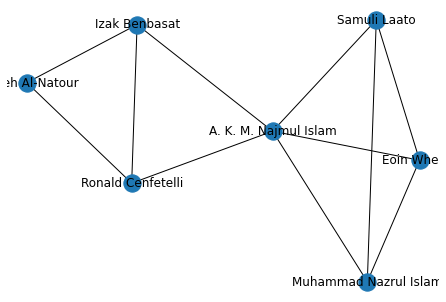

In [285]:
G_subgraph_with_Islam = G.subgraph(nx.node_connected_component(G, "Muhammad Nazrul Islam"))
nx.draw(G_subgraph_with_Islam, with_labels=True)

**Teilgraph aus der Zusammenhangskomponente, die den Knoten Muhammad Nazrul Islam enthält. Der Graph zeigt auch die Verbindungen der anderen Autoren auf, welche mit Muhammad Nazrul Islam verbunden sind.**

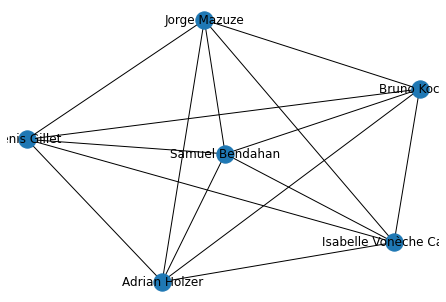

In [286]:
G_subgraph_with_Holzer = G.subgraph(nx.node_connected_component(G, "Adrian Holzer"))
nx.draw(G_subgraph_with_Holzer, with_labels=True)

**Teilgraph aus der Zusammenhangskomponente, die den Knoten Adrian Holzer enthält**

In [332]:
AdrianHolzer = 'Adrian Holzer' 
G_subgraph  = G.subgraph(nx.node_connected_component(G, AdrianHolzer))

print(f'alle Teammitglieder: {G_subgraph.nodes()}')
print(f'alle Teammitglieder: {nx.node_connected_component(G, AdrianHolzer)}')

alle Teammitglieder: ['Jorge Mazuze', 'Isabelle Vonèche Cardia', 'Bruno Kocher', 'Denis Gillet', 'Adrian Holzer', 'Samuel Bendahan']
alle Teammitglieder: {'Jorge Mazuze', 'Isabelle Vonèche Cardia', 'Bruno Kocher', 'Denis Gillet', 'Adrian Holzer', 'Samuel Bendahan'}


**Bestimmung des Teams, in dem der Name einer Person bekannt ist (Adrian Holzer)**

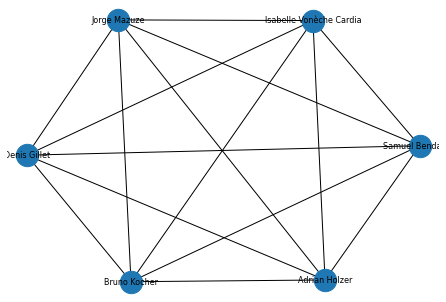

In [331]:
nx.draw(G_subgraph, with_labels=True, node_size=500, font_size=8)

### 5 Netzwerkanalyse
Analysieren Sie Ihr Netzwerk in Hinblick auf Kennzahlen, Communities bzw. Cliquen etc., so dass Sie insbesondere Ihre Fragen beantworten können und eine gute Interpretation Ihres Netzwerkes machen können. 

#### Gradzentralität
Die Gradzentralität basiert auf dem Knotengrad und gibt an, wie viele Verbindungen ein Akteur innerhalb des Netzwerkes hat.

In [289]:
# Knotengrad eines Knotens 
print(f'Knotengrad vom Knoten Adrian Holzer: {G.degree["Adrian Holzer"]}')

# Knotengrad mehrerer Knoten
print(f'Knotengrad von den Knoten Adrian Holzer und Muhammad Nazrul Islam: {list(G.degree(["Adrian Holzer", "Muhammad Nazrul Islam"]))}')

# Knotengrad eines Knotens oder mehrerer Knoten
print(f'Knotengrad von allen Knoten: {list(G.degree())}')

Knotengrad vom Knoten Adrian Holzer: 5
Knotengrad von den Knoten Adrian Holzer und Muhammad Nazrul Islam: [('Adrian Holzer', 5), ('Muhammad Nazrul Islam', 3)]
Knotengrad von allen Knoten: [('A. K. M. Najmul Islam', 5), ('Abayomi Baiyere', 2), ('Abdallah Alsaad', 3), ('Abdallah Taamneh', 3), ('Adamantia Pateli', 2), ('Adrian Holzer', 5), ('Aggeliki Tsohou', 2), ('Agnieszka Kacprzak', 1), ('Akshay Bhagwatwar', 3), ('Alain Klarsfeld', 4), ('Alain Pinsonneault', 4), ('Alejandro Germán Frank', 5), ('Aleksandre Asatiani', 5), ('Alexander Benlian', 3), ('Alexander D. Wilson', 6), ('Alexandra Durcikova', 2), ('Alfred Benedikt Brendel', 3), ('Aline Fernandes', 2), ('Alvaro E. Arenas', 1), ('Amanda J. Porter', 1), ('Ana Isabel Canhoto', 4), ('Ana Paula Barquet', 2), ('Anand Jeyaraj', 2), ('Andrea Carugati', 4), ('Andreas Hein', 5), ('Andreas Janson', 2), ('Andrew G. Mueller', 3), ('Andrew Hardin', 4), ('Andrew Urbaczewski', 4), ('André Hanelt', 3), ('Andy Nguyen', 3), ('Angelika Zimmermann', 2),

### Diagramm für Knotengrad

[Text(11, 0, '11'),
 Text(8, 0, '8'),
 Text(7, 0, '7'),
 Text(6, 0, '6'),
 Text(5, 0, '5'),
 Text(4, 0, '4'),
 Text(3, 0, '3'),
 Text(2, 0, '2'),
 Text(1, 0, '1'),
 Text(0, 0, '0')]

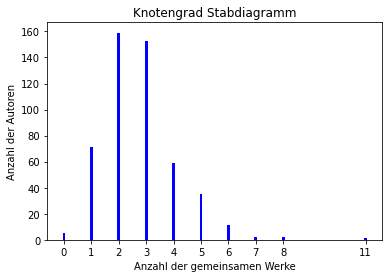

In [290]:
# Diagramm für Knotengrad
degree_sequence=sorted([d for n,d in G.degree()], reverse=True)
degreeCount=collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.10, color='b')

plt.title("Knotengrad Stabdiagramm")
plt.ylabel("Anzahl der Autoren")
plt.xlabel("Anzahl der gemeinsamen Werke")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

### Gradzentralität

Die Gradzentralität ist das einfachste Zentralitätsmaß, da es mithilfe der Knotengrade berechnet wird. Je mehr Verbindungen es zu anderen Knoten gibt, desto höher ist auch die Gradzentralität.
Da wir eine sehr große Anzahl an Verbindungen zwischen den Knoten haben, ist dementsprechend auch die Höhe der Gradzentralität <br/>

Damit werden die direkten Verbindungen der Knoten gemessen und in Relation zu allen Verbindungen gestellt. Jedoch kann man  keine Aussage über die Bedeutung in Hinblick auf eine kritische oder wichtige Position innerhalb des Netzwerkes sagen.

Es wird gerne dann verwendet, um __sehr vernetzte Akteure__, die eventuell die meiste Information innehaben, ausfindig zu machen.  

In [291]:
nx.degree_centrality(G)

{'A. K. M. Najmul Islam': 0.01006036217303823,
 'Abayomi Baiyere': 0.004024144869215292,
 'Abdallah Alsaad': 0.006036217303822938,
 'Abdallah Taamneh': 0.006036217303822938,
 'Adamantia Pateli': 0.004024144869215292,
 'Adrian Holzer': 0.01006036217303823,
 'Aggeliki Tsohou': 0.004024144869215292,
 'Agnieszka Kacprzak': 0.002012072434607646,
 'Akshay Bhagwatwar': 0.006036217303822938,
 'Alain Klarsfeld': 0.008048289738430584,
 'Alain Pinsonneault': 0.008048289738430584,
 'Alejandro Germán Frank': 0.01006036217303823,
 'Aleksandre Asatiani': 0.01006036217303823,
 'Alexander Benlian': 0.006036217303822938,
 'Alexander D. Wilson': 0.012072434607645876,
 'Alexandra Durcikova': 0.004024144869215292,
 'Alfred Benedikt Brendel': 0.006036217303822938,
 'Aline Fernandes': 0.004024144869215292,
 'Alvaro E. Arenas': 0.002012072434607646,
 'Amanda J. Porter': 0.002012072434607646,
 'Ana Isabel Canhoto': 0.008048289738430584,
 'Ana Paula Barquet': 0.004024144869215292,
 'Anand Jeyaraj': 0.0040241448

### Zwischenzentralität

Bei der Zwischenzentralität wird berücksichtigt, dass ein Knoten ein wichtiger "Verbindungsknoten" zu anderen sein kann. Das bedeutet, dass für jeden Knoten bestimmt wird, wie oft dieser auf einem kürzesten Weg zwischen zwei anderen Knoten liegt. <br/>
Somit haben Knoten mit hoher Zwischenzentralität eine besondere Position innerhalb des Netzwerkes, da sehr viel Information über diese Knoten fließt. 

VORSICHT: Knoten mit hoher Zwischenzentralität können zwei Zusammenhangskomponenten verbinden, aber es kann auch sein, dass sie sich am Rande eines Netzwerkes befinden. Daher sollte man sich das Netzwerk als Ganzes betrachten. 

Verwendet wird dieses Zentralitätsmaß um __einflussreiche Akteure für den Fluss__ innerhalb eines Netzwerkes zu finden. 


In [292]:
print("Zwischenzentralität")
print(nx.betweenness_centrality(G))

Zwischenzentralität
{'A. K. M. Najmul Islam': 7.301875770753553e-05, 'Abayomi Baiyere': 0.0, 'Abdallah Alsaad': 0.0, 'Abdallah Taamneh': 0.0, 'Adamantia Pateli': 0.0, 'Adrian Holzer': 0.0, 'Aggeliki Tsohou': 0.0, 'Agnieszka Kacprzak': 0.0, 'Akshay Bhagwatwar': 0.0, 'Alain Klarsfeld': 0.0, 'Alain Pinsonneault': 2.4339585902511846e-05, 'Alejandro Germán Frank': 0.0, 'Aleksandre Asatiani': 0.0, 'Alexander Benlian': 0.0, 'Alexander D. Wilson': 0.00021905627312260661, 'Alexandra Durcikova': 0.0, 'Alfred Benedikt Brendel': 0.0, 'Aline Fernandes': 0.0, 'Alvaro E. Arenas': 0.0, 'Amanda J. Porter': 0.0, 'Ana Isabel Canhoto': 0.0, 'Ana Paula Barquet': 0.0, 'Anand Jeyaraj': 0.0, 'Andrea Carugati': 0.0, 'Andreas Hein': 0.0, 'Andreas Janson': 0.0, 'Andrew G. Mueller': 0.0, 'Andrew Hardin': 0.0, 'Andrew Urbaczewski': 2.4339585902511846e-05, 'André Hanelt': 0.0, 'Andy Nguyen': 0.0, 'Angelika Zimmermann': 0.0, 'Anna Maria Oberländer': 0.0, 'Anna Sandberg': 0.0, 'Anna Wiedemann': 0.0, 'Annalisa Pelizza

### Nähezentralität

Bei der Nähezentralität werden alle Wege zu anderen Knoten ermittelt, und nicht jene zu naheliegende Knoten. Dazu werden alle kürzesten Wege von einem Knoten zu allen anderen berechnet, aufsummiert und der Kehrwert gebildet. In manchen Fällen spricht man daher auch von einer durchschnittlichen Wegdistanz eines Knotens zu anderen im Netzwerk. 

In einem sehr dichten Netzwerk unterscheiden sich die Nähezentralitäten der einzelnen Knoten kaum voneinander. Daher macht es oft Sinn, solche _Influencer_ in Cluster oder in Teilgraphen zu finden. 

Mit diesem Zentralitätsmaß können Akteure, die am __schnellsten__ alle anderen Knoten beeinflussen können, aufgedeckt werden. 

In [293]:
print("Closeness Zentralität")
print(nx.closeness_centrality(G))

Closeness Zentralität
{'A. K. M. Najmul Islam': 0.010347801092267891, 'Abayomi Baiyere': 0.004024144869215292, 'Abdallah Alsaad': 0.006036217303822937, 'Abdallah Taamneh': 0.006036217303822937, 'Adamantia Pateli': 0.004527162977867203, 'Adrian Holzer': 0.01006036217303823, 'Aggeliki Tsohou': 0.0053655264922870555, 'Agnieszka Kacprzak': 0.002012072434607646, 'Akshay Bhagwatwar': 0.006036217303822937, 'Alain Klarsfeld': 0.009054325955734407, 'Alain Pinsonneault': 0.008048289738430584, 'Alejandro Germán Frank': 0.01006036217303823, 'Aleksandre Asatiani': 0.01006036217303823, 'Alexander Benlian': 0.006036217303822937, 'Alexander D. Wilson': 0.014486921529175049, 'Alexandra Durcikova': 0.004024144869215292, 'Alfred Benedikt Brendel': 0.01195049082373026, 'Aline Fernandes': 0.009859154929577464, 'Alvaro E. Arenas': 0.002012072434607646, 'Amanda J. Porter': 0.004024144869215292, 'Ana Isabel Canhoto': 0.008048289738430584, 'Ana Paula Barquet': 0.004024144869215292, 'Anand Jeyaraj': 0.007243460

### 4 Eigenwertzentralität (eigenwert centrality)

Bei der Eigenwertzentralität wird der Einfluss eines Knotens wie bei der Gradzentralität auf Basis der Anzahl an Verbindungen zu anderen Knoten bestimmt. Zusätzlich wird aber auch noch berücksichtigt, wie gut der Knoten verlinkt ist und wie viele Verbindungen dieser verlinkte Knoten selbst hat. 

Damit kann man mit diesem Zentralitätsmaß __einflussreiche Knoten für das gesamte Netzwerk__ finden. 

In einem sehr dichten Netzwerk unterscheiden sich die Nähezentralitäten der einzelnen Knoten kaum voneinander. Daher macht es oft Sinn, solche _Influencer_ in Cluster oder in Teilgraphen zu finden. 

Eine Variante der Eigenwertzentralität ist _PageRank,_ wobei hier zusätzlich die Richtung und das Gewicht berücksichtigt werden. 

In [294]:
print("Eigenwertzentralität")
print(nx.eigenvector_centrality(G))

Eigenwertzentralität
{'A. K. M. Najmul Islam': 3.5850250814939676e-15, 'Abayomi Baiyere': 6.27629758356598e-28, 'Abdallah Alsaad': 3.4908001216809626e-18, 'Abdallah Taamneh': 3.4908001216809626e-18, 'Adamantia Pateli': 4.694840252125013e-26, 'Adrian Holzer': 0.00018968945500894566, 'Aggeliki Tsohou': 3.5199209134076144e-22, 'Agnieszka Kacprzak': 1.1550088731808969e-41, 'Akshay Bhagwatwar': 3.4908001216809626e-18, 'Alain Klarsfeld': 1.1723790389381378e-09, 'Alain Pinsonneault': 2.0599061627318618e-17, 'Alejandro Germán Frank': 0.00018968945500894566, 'Aleksandre Asatiani': 0.00018968945500894566, 'Alexander Benlian': 3.4908001216809626e-18, 'Alexander D. Wilson': 2.8268667089830802e-08, 'Alexandra Durcikova': 6.27629758356598e-28, 'Alfred Benedikt Brendel': 2.133314610374825e-08, 'Aline Fernandes': 1.7939214348647008e-08, 'Alvaro E. Arenas': 1.1550088731808969e-41, 'Amanda J. Porter': 5.879477172323039e-25, 'Ana Isabel Canhoto': 1.26446262521088e-10, 'Ana Paula Barquet': 6.2762975835659

### 5 Katzzentralität (katz centrality)

Bei der Katzzentralität wird der relative Einfluss eines Knotens gemessen, indem die Anzahl der nächsten Nachbarn (Knotengrad) und die Anzahl aller Knoten im Netzwerk, die mit den direkten Nachbarn verbunden sind. Die Verbindungen zu weiter entfernten Knoten werden mit einem Dämpfungsfaktor gewichtet. 

Dieses Zentralitätsmaß ähnelt der Eigenwertzentralität und dem PageRank. 

Es wird gerne für Zitationsnetzwerke und für Analysen im World Wide Web verwendet. 

In [295]:
print("Katzzentralität")
print(nx.katz_centrality(G))

Katzzentralität
{'A. K. M. Najmul Islam': 0.05326654864947457, 'Abayomi Baiyere': 0.03850649981143216, 'Abdallah Alsaad': 0.04400742835080996, 'Abdallah Taamneh': 0.04400742835080996, 'Adamantia Pateli': 0.038904385572966126, 'Adrian Holzer': 0.06161028218578305, 'Aggeliki Tsohou': 0.039401999806842336, 'Agnieszka Kacprzak': 0.03422799983238593, 'Akshay Bhagwatwar': 0.04400742835080996, 'Alain Klarsfeld': 0.05258128645062107, 'Alain Pinsonneault': 0.047703590307645545, 'Alejandro Germán Frank': 0.06161028218578305, 'Aleksandre Asatiani': 0.06161028218578305, 'Alexander Benlian': 0.04400742835080996, 'Alexander D. Wilson': 0.060049347429297885, 'Alexandra Durcikova': 0.03850649981143216, 'Alfred Benedikt Brendel': 0.04726445508122939, 'Aline Fernandes': 0.041093704442854595, 'Alvaro E. Arenas': 0.03422799983238593, 'Amanda J. Porter': 0.03505419293177252, 'Ana Isabel Canhoto': 0.051341998337300764, 'Ana Paula Barquet': 0.03850649981143216, 'Anand Jeyaraj': 0.04030213969763101, 'Andrea C

In [296]:
print(f'The Dichte der Knoten beträgt: {nx.density(G)}')

The Dichte der Knoten beträgt: 0.005519058123843463


**Dichte --> Verhältnis der Anzahl der Kanten im Graph zur Anzahl der möglichen Kanten
nx.density ist ein Wert zwischen 0 und 1. 1 repräsentiert einen vollständigen Graphen, 0 einen leeren Graphen.**

In [334]:
print(f'The Dichte der Knoten von G_subgraph_with_Islam beträgt: {nx.density(G_subgraph_with_Islam)}')
print(f'The Dichte der Knoten von G_subgraph_with_Holzer beträgt: {nx.density(G_subgraph_with_Holzer)}')

The Dichte der Knoten von G_subgraph_with_Islam beträgt: 0.5238095238095238
The Dichte der Knoten von G_subgraph_with_Holzer beträgt: 1.0


**Logischerweise ist jener Graph welcher alle Autoren beinhaltet nahezu ein leerer Graph. sieht man sich jedoch die Subgraphen mit Islam und Holzer an, erkennt man z.B. im Falle von Herrn Holzer, dass es ein vollständiger Graph ist.**

## Communities in Netzwerken

Communities in Netzwerkanalyse stellen eine Gruppe von Knoten dar, die zusammen einen Teilgraphen des Netzwerkes darstellen. Wie kann man Communities _besser_ definieren bzw. wie kann man sie in einem Netzwerk gut finden?

Dazu gibt es zwei Ansätze:
* über Zusammenhang: Eine Community entspricht einem zusammenhängenden Teilgraphen, die nicht unbedingt _getrennt_ sein müssen. D.h. wenn zwei Teilgraphen nur über einen Knoten verbunden sind, dann entspricht das zwei Communities. 
* über Dichte: Eine Community ist ein Teilgraph, dessen Knoten öfters miteinander verbunden sind als mit den übrigen Knoten. 

Zum Aufdecken von Communities gibt es verschiedene Algorithmen, z. B. 
* Girvan-Newman-Algorithmus: Bei diesem Algorithmus werden iterativ Kanten entfernt, so dass kleinere Teilgraphen (= Communities) zerfällt.
* Fluid-Communities-Algorithmus
* Label-Percolation-Algorithmus
* Clique-Percolation-Algorithmus
* Kernigham-Lin-Algorithmus


In [297]:
from networkx.algorithms import community

VIP_Autoren = community.girvan_newman(G)
VIP_Autoren

<generator object girvan_newman at 0x00000285A01F30B0>

In [298]:
top_level_communities = next(VIP_Autoren)
next_level_communities = next(VIP_Autoren)
sorted(map(sorted, next_level_communities))

[['A. K. M. Najmul Islam',
  'Eoin Whelan',
  'Izak Benbasat',
  'Muhammad Nazrul Islam',
  'Ronald Cenfetelli',
  'Sameh Al-Natour',
  'Samuli Laato'],
 ['Abayomi Baiyere', 'Hannu Salmela', 'Tommi Tapanainen'],
 ['Abdallah Alsaad', 'Abdallah Taamneh', 'Hamzah Elrehail', 'Ismail Sila'],
 ['Adamantia Pateli',
  'John Krogstie',
  'Patrick Mikalef',
  'Rogier van de Wetering'],
 ['Adrian Holzer',
  'Bruno Kocher',
  'Denis Gillet',
  'Isabelle Vonèche Cardia',
  'Jorge Mazuze',
  'Samuel Bendahan'],
 ['Aggeliki Tsohou',
  'Mike Newman',
  'Mikko Siponen',
  'Nirup Menon',
  'Pallab Sanyal'],
 ['Agnieszka Kacprzak', 'Przemysław G. Hensel'],
 ['Akshay Bhagwatwar',
  'Hillol Bala',
  'Mohammad Mobashar Hossain',
  'Xuan Feng'],
 ['Alain Klarsfeld',
  'Bogdan Negoita',
  'Gaëlle Cachat-Rosset',
  'Josianne Marsan',
  'Kevin Carillo',
  'Kevin Daniel André Carillo',
  'Tania Saba'],
 ['Alain Pinsonneault',
  'Inmyung Choi',
  'Kunsoo Han',
  'Salman Nazir',
  'Sunghun Chung'],
 ['Alejandro Ge

In [299]:
communities=list(nx.community.label_propagation_communities(G))
print(len(communities))
print(communities)

137
[{'Annalisa Pelizza'}, {'Dirk Deichmann', 'Christine Moser'}, {'Dirk Neumann', 'Daniel Drummer'}, {'Donald E. Wynn Jr.', 'Clay K. Williams'}, {'Egil Øvrelid', 'Bendik Bygstad'}, {'Ofir Turel', 'Hamed Qahri-Saremi', 'Babajide Osatuyi'}, {'Deborah R. Compeau', 'Hsingyi P. Tsai'}, {'Ersin Dincelli', 'InduShobha Chengalur-Smith'}, {'Ismail Sila', 'Hamzah Elrehail', 'Abdallah Taamneh', 'Abdallah Alsaad'}, {'Erika Valderrama', 'Cristina Alaimo', 'Jannis Kallinikos'}, {'Jie Mein Goh', 'Alvaro E. Arenas'}, {'Jim E. Helm'}, {'Joan Rodon Modol', 'Ben Eaton'}, {'Jeffrey Hughes', 'Joe McDonagh'}, {'Johann Kranz'}, {'John Mingers', 'Craig Standing'}, {'João S. Oliveira', 'Eleni Lioliou', 'Angelika Zimmermann'}, {'Gerit Wagner', 'Julian Prester', 'Guy Paré'}, {'I-Chia Chou', 'Jung-Chieh Lee', 'Chung-Yang Che'}, {'Ka Chung Ng', 'Jie Tang', 'Dongwon Lee'}, {'Cornelia Gaebert', 'Karlheinz Kautz'}, {'Hannes Rothe', 'Ana Paula Barquet', 'Lauri Wessel'}, {'Lemuria Carter', 'Dapeng Liu', 'Jiesen Lin'},

In [300]:
node_color_number=[]
for node in G:
    for community in range(len(communities)):
        if str(node) in communities[community]:
            node_color_number.append(community*100)

In [301]:
node_color_number

[6000,
 9800,
 800,
 800,
 5400,
 5900,
 4200,
 4400,
 11900,
 8900,
 8300,
 10500,
 9000,
 2900,
 5300,
 5800,
 9700,
 11300,
 1000,
 2300,
 6500,
 2100,
 10700,
 2700,
 5100,
 7200,
 12600,
 8400,
 12600,
 9700,
 10000,
 1600,
 3300,
 10300,
 2400,
 0,
 2600,
 2700,
 9000,
 6600,
 3900,
 6100,
 6400,
 6800,
 4000,
 500,
 2400,
 2300,
 1200,
 400,
 9300,
 2500,
 8800,
 9700,
 8900,
 5300,
 11400,
 7900,
 11000,
 5900,
 10100,
 7700,
 12000,
 2900,
 8200,
 12100,
 3800,
 7800,
 9600,
 100,
 11300,
 4500,
 1800,
 300,
 3900,
 6200,
 7000,
 2000,
 1500,
 7500,
 900,
 13300,
 10500,
 200,
 3000,
 13200,
 2800,
 2200,
 13100,
 7800,
 600,
 5900,
 8800,
 9100,
 100,
 200,
 5200,
 2900,
 10000,
 8200,
 300,
 7500,
 1900,
 2300,
 11200,
 13200,
 400,
 1600,
 5200,
 11000,
 6000,
 10600,
 11800,
 900,
 700,
 9000,
 8000,
 5100,
 8500,
 4000,
 2600,
 2500,
 8900,
 11000,
 2800,
 1700,
 8400,
 6900,
 7400,
 1700,
 500,
 3400,
 800,
 13600,
 2100,
 9800,
 2400,
 5700,
 2400,
 10300,
 11900,
 1120

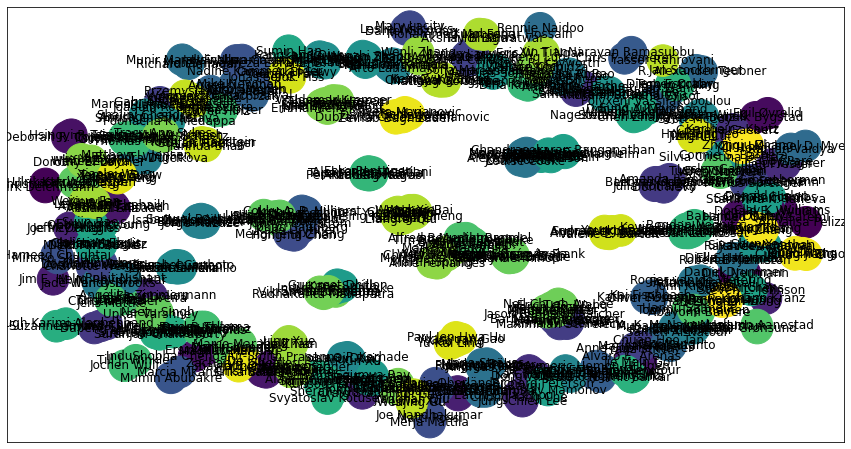

In [302]:
plt.figure(figsize=(15,8))
pos=nx.spring_layout(G,weight=None)
nx.draw_networkx(G,pos,with_labels=True, node_color=node_color_number,node_size=1000,)
plt.draw()

ValueError: 'c' argument has 498 elements, which is inconsistent with 'x' and 'y' with size 6.

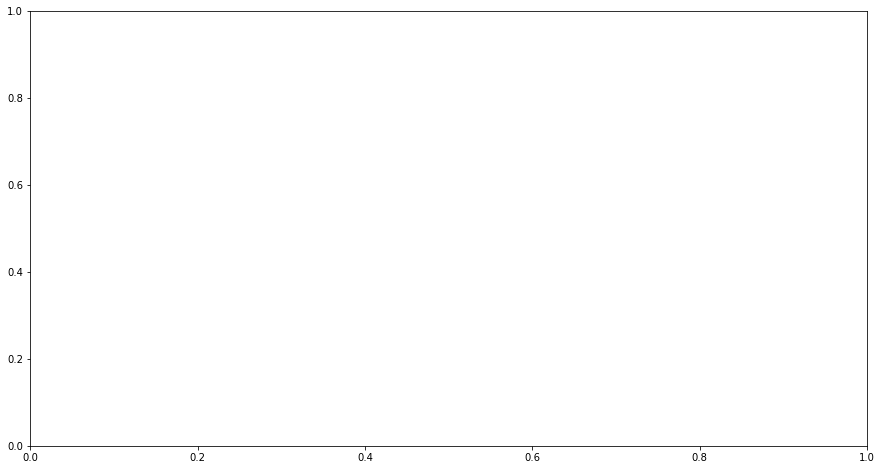

In [335]:
plt.figure(figsize=(15,8))
pos=nx.spring_layout(G_subgraph_with_Holzer,weight=None)
nx.draw_networkx(G_subgraph_with_Holzer,pos,with_labels=True, node_color=node_color_number,node_size=1000,)
plt.draw()

#Ich konnte diesen Fehler leider nicht lösen. Meine Absicht war es, eine Übersicht durch die Darstellung
#eines Subgraphen darzustellen. Zur Lösung müsste man die Anzahl der Elemenze von c auf 6 reduzieren.
#Das Problem ist, dass die Farbewerte nicht übereinstimmen.

### Cliquen in einem Graph

Eine Clique ist eine _maximale_ Teilmenge von mindestens 3 Knoten in einem ungerichteten Graphen, so dass jeder Knoten mit jedem anderen Knoten in der Clique direkt verbunden ist. 

Bei einer n-Clique beträgt der Abstand zwischen je 2 Knoten in diesem Teilgraphen maximal n Kanten. 

Dreiecke (Triangles) sind Cliquen mit 3 Knoten. Für einige Analysen sind diese wichtig, da sie auch Aussagen über die Dichte eines Graphen zulassen. 

In [303]:
Cliquen = list(nx.clique.find_cliques(G))
print(len(Cliquen))

174


In [304]:
nx.triangles(G)

{'A. K. M. Najmul Islam': 4,
 'Abayomi Baiyere': 1,
 'Abdallah Alsaad': 3,
 'Abdallah Taamneh': 3,
 'Adamantia Pateli': 1,
 'Adrian Holzer': 10,
 'Aggeliki Tsohou': 1,
 'Agnieszka Kacprzak': 0,
 'Akshay Bhagwatwar': 3,
 'Alain Klarsfeld': 6,
 'Alain Pinsonneault': 3,
 'Alejandro Germán Frank': 10,
 'Aleksandre Asatiani': 10,
 'Alexander Benlian': 3,
 'Alexander D. Wilson': 5,
 'Alexandra Durcikova': 1,
 'Alfred Benedikt Brendel': 3,
 'Aline Fernandes': 1,
 'Alvaro E. Arenas': 0,
 'Amanda J. Porter': 0,
 'Ana Isabel Canhoto': 6,
 'Ana Paula Barquet': 1,
 'Anand Jeyaraj': 1,
 'Andrea Carugati': 6,
 'Andreas Hein': 10,
 'Andreas Janson': 1,
 'Andrew G. Mueller': 3,
 'Andrew Hardin': 6,
 'Andrew Urbaczewski': 3,
 'André Hanelt': 3,
 'Andy Nguyen': 3,
 'Angelika Zimmermann': 1,
 'Anna Maria Oberländer': 1,
 'Anna Sandberg': 0,
 'Anna Wiedemann': 3,
 'Annalisa Pelizza': 0,
 'Anne-Sophie Mayer': 1,
 'Antonio Giangreco': 6,
 'Antti Salovaara': 10,
 'Anuragini Shirish': 1,
 'Arno L. P. Nuijten'

In [305]:
nx.triangles(G, "Adrian Holzer")

10

In [306]:
alle_cliquen = nx.enumerate_all_cliques(G)
alle_cliquen

<generator object enumerate_all_cliques at 0x00000285A01F3E40>

In [307]:
list(nx.enumerate_all_cliques(G))

[['A. K. M. Najmul Islam'],
 ['Abayomi Baiyere'],
 ['Abdallah Alsaad'],
 ['Abdallah Taamneh'],
 ['Adamantia Pateli'],
 ['Adrian Holzer'],
 ['Aggeliki Tsohou'],
 ['Agnieszka Kacprzak'],
 ['Akshay Bhagwatwar'],
 ['Alain Klarsfeld'],
 ['Alain Pinsonneault'],
 ['Alejandro Germán Frank'],
 ['Aleksandre Asatiani'],
 ['Alexander Benlian'],
 ['Alexander D. Wilson'],
 ['Alexandra Durcikova'],
 ['Alfred Benedikt Brendel'],
 ['Aline Fernandes'],
 ['Alvaro E. Arenas'],
 ['Amanda J. Porter'],
 ['Ana Isabel Canhoto'],
 ['Ana Paula Barquet'],
 ['Anand Jeyaraj'],
 ['Andrea Carugati'],
 ['Andreas Hein'],
 ['Andreas Janson'],
 ['Andrew G. Mueller'],
 ['Andrew Hardin'],
 ['Andrew Urbaczewski'],
 ['André Hanelt'],
 ['Andy Nguyen'],
 ['Angelika Zimmermann'],
 ['Anna Maria Oberländer'],
 ['Anna Sandberg'],
 ['Anna Wiedemann'],
 ['Annalisa Pelizza'],
 ['Anne-Sophie Mayer'],
 ['Antonio Giangreco'],
 ['Antti Salovaara'],
 ['Anuragini Shirish'],
 ['Arno L. P. Nuijten'],
 ['Arto Lanamäki'],
 ['Arun Rai'],
 ['Atr

### 5 Conclusio
Beurteilen Sie Ihre Vorgehensweise und interpretieren Sie Ihre Ergebnisse aus den Daten. Dazu können folgende Fragen hilfreich sein: 
* Wie beurteilen Sie Ihre Wahl des Netzwerkes, die Wahl der Knoten und Kanten?
* Können Sie mit Ihrem Netzwerk Ihre ursprünglichen Fragen beantwortet? Wenn nein, warum nicht? 
* Welche weiteren Fragen können mithilfe Ihres Netzwerkes beantwortet werden? Oder braucht es weitere Informationen?
* Ergeben Sie aus Ihren Ergebnisse neue Fragestellungen? Könnten diese mit einem weiteren Netzwerk beantwortet werden? Wenn ja, wie? Wenn nein, warum nicht? 

**Um ehrlich zu sein erschien mir die getroffene Auswahl des Netzwerkes mit Autoren als Knoten und gemeinsame Dokumente als Kanten am logischsten. Ich habe mir eine übersichtliche Netzwerkanalyse mit überschaubaren Knotenpaaren erwartet. Jedoch habe ich die Anzahl der Autoren sowie die Anzahl der gemeinsamen Werke unterschätzt. Ich habe vorallem die Anzahl der Autorenpaare unterschätzt, welche nicht mehr als 2 gemeinsame Werke veröffentlicht haben. Ich habe nicht damit gerechnet, dass so viele Autoren nahezu zumindest 1 gemeinsames Werk mit all den anderen Autoren veröffentlicht haben.**

**Da die Graphen mit allen Autoren relativ unbrauchbar ist, da die Anzahl einfach viel zu groß ist, würde es sich anbieten mit Teilgraphen zu arbeiten wie zum Beispiel der Teilgraph aus der Zusammenhangskomponente, die den Knoten Adrian Holzer enthält (G_subgraph_with_Holzer). Diese Teilgraphen sind wesentlich übersichtlicher und es lässt sich wesentlich leichter erkennen,
welche Autoren in den jeweiligen Communities/Cliquen miteinander veröffentlicht haben.**

#### Welche/welcher AutorIn hat den höchsten Knotengrad --> Am meisten mit anderen AutorInnen publiziert
#### Schwankt die Zahl der zusammen publizierten Werke je Autor sehr stark, oder haben die meisten Autoren ungefähr gleiche Anzahl an gemeinsamen Publikationen
#### Ist die Anzahl der Autoren zu groß für ein Netzwerk welches alle Autoren miteinbeschließt? Ist es sinnvoll?

**Folgender Autor hat den höchsten Knotengrad: Yong Yin hat 11 Werke gemeinsam mit anderen AutorInnen publiziert
**Die Zahl schwankt nicht besonders stark. Eine überwiegende Anzahl der AutorInnen hat 2-3 Werke gemeinsam publiziert.
**Ja. Man sollte Cliquen und Communities bilden, da ein Netzwerk mit allen AutorInnen mit unserer Fragestellung sehr unübersichtlich ist.

### möglicherweise hilfreiche Routinen

In [308]:
"""from nameparser import HumanName

def normalize_name(name):
    '''
    transforms names in last name, first name (abbreviation), middle name 
    @param name (str)
    @return normalized name (str)
    '''
    parsed = HumanName(name)
    if len(parsed.middle) > 0:
        middle = parsed.middle[:1] + '.'
    else:
        middle = ''
    normalized_name = parsed.last + ', ' + parsed.first[:1] + '.' + middle
    return normalized_name"""

ModuleNotFoundError: No module named 'nameparser'

In [ ]:
"""from itertools import chain
from collections import Counter 

def countList(listOflists, string):
     '''
    counts element string in a list of lists 
    @param listOflists (list)
    @param string (str)
    @return (num)
    '''
    return Counter(chain.from_iterable(set(i) for i in listOflists))[string]"""

In [ ]:
"""def graph_attribute(graph, attribute, size_fact=100, isnode=True):
    '''
    transforms graph attribute in list
    @param graph (networkx graph) graph with (node oder egde) attributes
    @param attribute (str) name of attribute
    @param size_fact (integer) value for scaling of attribute values 
    @param isnode (bool) if isnode=True node attributes are read
    
    @return list_weights (list) list of weights for skaling
    
    '''
    if isnode:
        list_weights = list(nx.get_node_attributes(graph, attribute).values())
    else:
        list_weights = list(nx.get_edge_attributes(graph, attribute).values())
    list_weights = [i*size_fact for i in list_weights]
    return list_weights

def draw_graph(graph, layout=nx.spring_layout, color_attr='betweenness', 
               size_attr='degree', size_factor=100, labelOn=True, edge_weights=False):
    '''
    plots a network with different node size, node color and edge size
    calls function graph_attribute
    
    @param graph (networkx graph) graph with (node oder egde) attributes
    @param layout (str) name of layout for network
    @param color_attr(str) name of attribute for coloring nodes
    @param size_attr (str) name of attribute for determing the node size
    @param size_fact (integer) value for scaling of attribute values
    @param labelOn (bool) if labelOn=True the names of the nodes are displayed
    @param edge_weights (bool) if edge_weights=True the weights of edges are displayed
    
    @return plot   
    
    '''
    
    pos = layout(graph)
    
    node_color=graph_attribute(graph, color_attr, size_fact=size_factor)
    node_size=graph_attribute(graph, size_attr, size_fact=size_factor)
     
    plt.figure(figsize=(15,10))
    nx.draw_networkx(graph, pos=pos, with_labels=labelOn,
                 node_color=node_color,
                 node_size=node_size )
    if edge_weights:
        edge_weights = nx.get_edge_attributes(graph, "weight")
        nx.draw_networkx_edge_labels(graph,pos,edge_labels=edge_weights)

    plt.axis('off');"""